# Advanced Macro: Dynamic Programming
<br>
<div style="text-align: center;">
June 2020, revised June 2021 Takeki Sunakawa
<br>
<div style="text-align: center;">    
Hitotsubashi University

# Introduction

- A dynamic optimization problem (such as the one for the RCK model) is often *recursive*.

- That is, the problem does not depend on the period in which individuals make decisions.

- Dynamic programming is a very powerful tool to solve recursive problems.

- My lecture is based on a Russell Cooper's note dp_intro_may2013.pdf (which is a part of his book). McCandless Chs. 4 and 5 is also a good reference.

# Cake-eating problem

- We have a cake of size $W_{1}$ at the beginning of period $t=1$.

- At each point of time, $t=1,2,3,\dots,T$, we can consume some of the cake and save the rest.

- Let $c_{t}$ be consumption in period $t$ and let $u(c_{t})$ be the flow of utility from this consumption.

- $u(c)$ satisfies the standard assumptions: It is differentiable, strictly increasing, and strictly concave. That is, $u_{c}=u'(c)>0$ and $u_{cc}=u''(c)<0$. Also $\lim_{c\rightarrow0}u'(c)=\infty$ (Inada condition).

## Cake-eating problem defined

- The lifetime utility is given by

$$
    \sum_{t=1}^{T}\beta^{t-1}u(c_{t})
$$

where $\beta\in(0,1)$ is discount factor.

- The cake does not depreciate (melt) or grow. Hence, the evolution of the cake over time is governed by: 

$$
W_{t+1}=W_{t}-c_{t}
$$

for $t=1,2,...,T$. 

- How to find the optimal path of consumption, $\{c_{t}\}_{t=1}^{T}$?

## Direct attack

- One approach is to solve the optimization problem directly. Consider the problem of

$$
    \max_{\{c_{t},W_{t+1}\}_{t=1}^{T}}\sum_{t=1}^{T}\beta^{t-1}u(c_{t})
$$

subject to

$$
    W_{t+1}=W_{t}-c_{t}
$$

for $t=1,2,3,...,T$. Also, $c_{t}>0$ and $W_{t}>0$ for each $t$. $W_{1}$ is given. 

- Alternatively, the constraint is recursively obtained as

$$
    \sum_{t=1}^{T}c_{t}+W_{T+1}=W_{1}.
$$

- For the moment, we assume the size of the cake after the last period T is greater than or equal to 0:

$$
    W_{T+1} \geq 0.
$$

- Let $\lambda$ and $\phi$ be the multiplier on the constraints. We set up the Lagrangean as

$$
    L_{0} = \sum_{t=1}^{T}\beta^{t-1}u(c_{t}) + \lambda \left(W_{1} - \sum_{t=1}^{T}c_{t}-W_{T+1} \right) + \phi W_{T+1}
$$

- The FOCs are

$$
\beta^{t-1}u'(c_{t})=\lambda
$$

for $t=1,2,...,T$ and $\phi=\lambda$. 

- Combining equations, 

$$
    u'(c_{t})=\beta u'(c_{t+1})
$$

holds for $t=1,2,...,T-1$, which is an Euler equation.

- Note that having the Euler equation is *necessary* but not *sufficient*.

- Suppose $W_{T+1}>0$ so that there is cake left over. This is clearly an inefficient plan. This shows $W_{T+1}=0$ and $\lambda=\phi>0$ must hold.

- So, in effect, the problem is pinned down by an initial and terminal condition.

## Value function

- Let

$$
    V_{1}(W_{1})=\max_{\{c_{t},W_{t+1}\}_{t=1}^{T}}\sum_{t=1}^{T}\beta^{t-1}u(c_{t}),
$$

which is called a value function.

- Note that

$$
    V'_{1}(W_{1})=\lambda=\beta^{t-1}u'(c_{t})
$$

for $t=1,2,...,T$, as $W_{1}=\sum_{t=1}^{T}c_{t}+W_{T+1}$.

- **The Benveniste-Scheinkman theorem**: An increase in the size of the cake leads to an increase in lifetime utility equal to the marginal utility in *any* period. It doesn't matter when the extra cake is eaten given that the consumer is acting optimally.

## Adding period 0

- We add a period 0 and give an initial cake of size $W_{0}$.

- Dynamic programming converts a T+1 period problem (for t=0,1,2,...T) into a 2 period problem with rewriting of the objective function. It uses the value function obtained from solving a shorter horizon (T period) problem.

## Dynamic programming

- Given $W_{0}$, consider the problem of

$$
    \max_{c_{0}}u(c_{0})+\beta V_{1}(W_{1})
$$

where $W_{1}=W_{0}-c_{0}$.


- **The principle of optimality**: It doesn’t matter how the cake will be consumed after the initial period 0 (i.e., $c_{1},c_{2},...,c_{T}$). The agent will be acting optimally and thus generating $V_{1}(W_{1})$.

- Note that

$$
    u'(c_{0})=\beta V'_{1}(W_{1}).
$$

- Also from the Benveniste-Scheinkman formula,

$$
    V'_{1}(W_{1})=u'(c_{1})=\beta u'(c_{2})=\cdots=\beta^{t}u'(c_{t+1})
$$

for $t=1,2,...,T-1$.

- These two conditions yields

$$
    u'(c_{t})=\beta u'(c_{t+1})
$$

for $t=0,1,2,...,T-1$.

# Building the value function

- The problem looks simple by pretending that we have $V_{1}(W_{1})$. But how do we get it?

- We will build $V_{T}(W_{T}),V_{T-1}(W_{T-1}),\cdots,V_{1}(W_{1})$ recursively starting from the last period's problem (this is called backward induction).

## Three period example

- Suppose the following sequence problem

$$
    \max_{\{c_{t},W_{t+1}\}_{t=0}^{2}} u(c_{0}) + \beta u(c_{1}) + \beta^{2} u(c_{2})
$$

subject to

$$
    W_{t+1}=W_{t}-c_{t}
$$

for $t=0,1,2$, given $W_{0}$.

- Assume $u(c)=\ln(c)$.

- For $t=T=2$, $W_{t+1}=W_{3}=0$, so $c_{2}=W_{2}$ and $V_{2}(W_{2})=\ln(W_{2})$.

- For $t=1$, the value function is 

$$
    V_{1}(W_{1}) = \max_{W_{2}} \ln(W_{1}-W_{2})+\beta V_{2}(W_{2}), \\
$$

- The first-order condition and resource constraint are

$$
    1/c_{1}=\beta V_{2}'(W_{2})=\beta/W_{2}, \\
    W_{1}=c_{1}+c_{2}.
$$

Note that we know $W_{2}=c_{2}$.

- Then we have

$$
    c_{1}=\frac{W_{1}}{1+\beta},\quad c_{2}=\frac{\beta W_{1}}{1+\beta}.
$$

- From this, we can solve for

$$
\begin{align}
    V_{1}(W_{1}) &=	\ln(c_{1})+\beta\ln(c_{2}), \\
    &= \ln(W_{1}/(1+\beta)) + \beta\ln(\beta W_{1}/(1+\beta)), \\
    &= \ln(1/(1+\beta)) + \ln(W_{1}) + \beta\ln(\beta/(1+\beta)) + \beta\ln(W_{1}), \\
	&= A_{1}+B_{1}\ln(W_{1}),
\end{align}
$$

where $A_{1}=\ln(1/(1+\beta))+\beta\ln(\beta/(1+\beta))$ and $B_{1}=1+\beta$.

- For $t=0$, the value function is

$$
    V_{0}(W_{0})=\max_{W_{1}}\ln(W_{0}-W_{1})+\beta V_{1}(W_{1}).
$$

- The first order condition and resorce constraint are

$$
\begin{align}
    1/c_{0}=\beta V_{1}'(W_{1})=\beta B_{1}/W_{1}, \\
    W_{0} = c_{0} + W_{1},
\end{align}
$$

where $B_{1}=1+\beta$.

- Note that from the $t=1$ problem, we know $W_{1}=(1+\beta)c_{1}$, then

$$
    1/c_{0}=\beta/c_{1},\\
    W_{0} = c_{0} + (1+\beta)c_{1}.
$$

- Then we have

$$
    c_{0}=\frac{W_{0}}{1+\beta+\beta^{2}}, \quad c_{1}=\frac{\beta W_{0}}{1+\beta+\beta^{2}}.
$$

- Also we know from the $t=1$ problem,

$$
    1/c_{1}=\beta/c_{2}.
$$

- Then,

$$
    c_{2}=\frac{\beta^{2}W_{0}}{1+\beta+\beta^{2}}.
$$

- Finally, substituting into $V_{0}(W_{0})$ yields

$$
\begin{align}
    V_{0}(W_{0})&=\ln(c_{0}) + \beta\ln(c_{1}) + \beta^{2}\ln(c_{2}), \\
    &=\ln(W_{0}/(1+\beta+\beta^{2})) + \beta\ln(\beta W_{0}/(1+\beta+\beta^{2})) + \beta^{2}\ln(\beta^{2}W_{0}/(1+\beta+\beta^{2})), \\
    &=A_{0}+B_{0}\ln(W_{0}), \\
\end{align}
$$

where

$$
\begin{align}    A_{0}&=\ln(1/(1+\beta+\beta^{2}))+\beta\ln(\beta/(1+\beta+\beta^{2}))+\beta^{2}\ln(\beta^{2}/(1+\beta+\beta^{2})), \\
B_{0}&=1+\beta+\beta^{2}.
\end{align}
$$

## Infinite horizon

- Suppose the following infinite horizon sequence problem

$$
    \max_{\{c_{t},W_{t+1}\}_{t=0}^{\infty}}\sum_{t=0}^{\infty}\beta^{t}u(c_{t})
$$

subject to

$$
    W_{t+1}=W_{t}-c_{t}
$$

for $t=0,1,2,...,\infty$, given $W_{0}$.

- Specifying this as a dynamic programming problem

$$
    V(W)=\max_{c\in[0,W]}u(c)+\beta V(W-c).
$$

- Alternatively, we specify the problem as choosing tomorrow's state

$$
    V(W)=\max_{W'\in[0,W]}u(W-W')+\beta V(W').
$$

Either specification yields the same result. 

- This is a functional equation called as a **Bellman equation**.

## Analytical example

- Sometimes there is the analytical solution. We use a guess and verify method.

- Given the previous results in the three-period problem, we conjecture that the value function takes the form of:

$$
    V(W)=A+B\ln W.
$$

- Taking this guess, the functional equation becomes

$$
    A+B\ln W = \max_{W'}\ln(W-W')+\beta(A+B\ln W')
$$

for all $W$.

- After some algebra,

$$
    W'=\frac{\beta B}{1+\beta B}W
$$

which implies

$$
    A+B\ln W=\ln\frac{W}{1+\beta B}+\beta\left[A+B\ln\left(\frac{\beta BW}{1+\beta B}\right)\right]
$$

for all $W$. 

- Collecting a constant and the terms related to $\ln(W)$ in both sides,

$$
\begin{align}
    A&=\beta A+\beta B\ln(\beta B)-(1+\beta B)\ln(1+\beta B), \\
    B\ln(W)&=\ln(W)+\beta B\ln(W), 
\end{align}
$$

which can be solved for $A$ and $B$.

- Then we have

$$
\begin{align}
    A &= \left(\beta B\ln(\beta B)-(1+\beta B)\ln(1+\beta B)\right)/(1-\beta), \\
    B &= 1/(1-\beta).
\end{align}
$$

- With this solution, we also have

$$
    c=(1-\beta)W, \quad W'=\beta W.
$$

The optimal policy is to save a constant fraction of the cake and eat the remaining fraction.

# Value function iteration

- The above example can be solved numerically too. We use the value function iteration method with a successive approximation.

- From the Bellman equation, we obtain the new value function $V^{*}(W)$

$$
    V^{*}(W) = \max_{W'}\left\{ \ln(W-W')+\beta V(W')\right\},
$$

taking the old value function $V(W)$ as given.

- We update the value function iteratively until the function converges, i.e., $\left\Vert V^{*}(W)-V(W)\right\Vert \leq\epsilon$.

- We need to approximate $V(W')$, and numerically solve the maximization problem with regard to $W'$.

## Successive approximation

- $W$ is on a compact space $[0,\bar{W}]$ and $V(W)$ is a function defined on the compact space.

- Let $W_{i}\in\mathcal{W}=\{W_{0},W_{1},...,W_{n-1}\}$ where $W_{0}<W_{1}<...<W_{n-1}$. These are called *grid points*.

- Then, $V(W)$ is approximated by a $(n\times1)$ vector of the values $\mathbf{v}=\{V(W_{i})\}_{i=0}^{n-1}$.

In [1]:
# parameter
β = 0.9                        # discount factor

# set grid
nw = 1001                      # number of grid points
wgrid = collect(range(0.0,stop=1.0,length=nw)) # evenly spaced grid points from 0.0 to 1.0
wgrid[1] = wgrid[2]/10         # avoid w=c=0

# analytical solution
B = 1/(1-β)
A = (β*B*log(β*B)-(1+β*B)*log(1+β*B))/(1-β)
vvec = A .+ B*log.(wgrid)      # value function
wvec = β*wgrid                 # policy function

1001-element Vector{Float64}:
 9.0e-5
 0.0009000000000000001
 0.0018000000000000002
 0.0027
 0.0036000000000000003
 0.0045000000000000005
 0.0054
 0.0063
 0.007200000000000001
 0.0081
 0.009000000000000001
 0.009899999999999999
 0.0108
 ⋮
 0.8901
 0.891
 0.8919
 0.8928
 0.8937
 0.8946000000000001
 0.8955
 0.8964
 0.8973
 0.8982
 0.8991
 0.9

- We can successively update the approximation as follows:

0. Construct a matrix for the current utility $\underset{(n \times n)}{\mathbf{U}}=\{\{u_{ij}\}\}$

  - Let $i$ be the index for the current period's cake. That is, $W_{i}=W$.
  
  - Also let $j$ be the index for the next period's cake. That is, $W_{j}=W'$.
  
  - Then, if $c_{ij}=W_{i}-W_{j}>0$, set
  $$
    u_{ij} = \ln c_{ij}
  $$
  Otherwise, set a large negative number (say -10000000000) to $u_{ij}$.

In [2]:
# 0. construct the current utility
umat = zeros(nw,nw)
for iw in 1:nw
    for jw in 1:nw
        wnow = wgrid[iw]  # W
        wp = wgrid[jw]    # W'
        cnow = wnow-wp      # c=W-W'
        if cnow>0
            # if c >0, the utility value is log(c)
            umat[iw,jw] = log(cnow)
        else
            # if c<=0, the utility value is set so that the index j is never chosen. 
            umat[iw,jw] = -1e+10 # -10000000000 (i.e., ten zeros)
        end
    end
end

# NOTE: to avoid log(0) when wnow=wp=0
umat[1,1] = log(wgrid[1])

-9.210340371976182

1. For each index of the current period $i=0,1,...,n-1$ and given a vector of the values $\{V(W_{i})\}_{i=0}^{n-1}$, 

  - Let $\underset{(n \times 1)}{\mathbf{u}}=[u_{i0},...,u_{ij},...,u_{in-1}]$ and $\underset{(n \times 1)}{\mathbf{v}}=[V(W_{0}),...,V(W_{j}),...V(W_{n-1})]$.

  - Find the index of the next period $j$ so as to maximize the value function
$$
    V^{*}(W_{i})=\max_{j}\left\{ \mathbf{u}+\beta\mathbf{v}\right\}
$$

  - Then we obtain a vector of the values $\{V^{*}(W_{i})\}_{i=0}^{n-1}$, which approximate the (new) value function.

2. Update the old value function $\{V(W_{i})\}_{i=0}^{n-1}$ with the new value function $\{V^{*}(W_{i})\}_{i=0}^{n-1}$. Iterate 1-2
until convergence.

In [3]:
wvec0 = zeros(nw)     # policy function
vvec0 = zeros(nw)     # old value function
vvec1 = zeros(nw)     # new value function

diff = 1e+4

while diff>1e-4 # while loop until the condition diff>1e-4 met

    for iw in 1:nw # for each index of the current period, iw=0,...,nw-1    
        # 1. find the index of the next period jw so as to maximize the value function
        jw = argmax(umat[iw,:] + β*vvec0)
        vvec1[iw] = umat[iw,jw] + β*vvec0[jw]   # V*(W)
        wvec0[iw] = wgrid[jw]                   # W'(W)
    end

    diff  = maximum(abs.(vvec1-vvec0)) # the condition for convergence
    # 2. update the value function
    vvec0 = copy(vvec1)
    
end

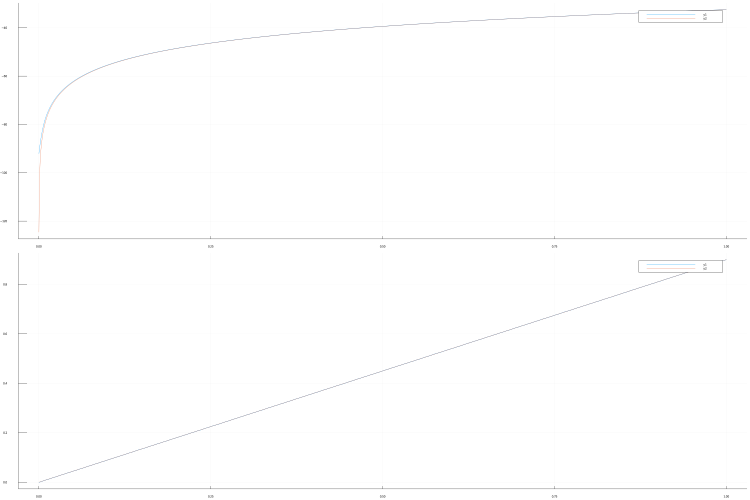

In [5]:
# import matplotlib.pyplot as plt
# plt.rc('xtick',labelsize=20) 
# plt.rc('ytick',labelsize=20) 

# fig = plt.figure(figsize=(15.0,10.0))
# ax  = fig.add_subplot(2,1,1); ax.grid();
# ax.set_ylabel("$V(W)$",size=24);
# ax.plot(wgrid,vvec,'b-')
# ax.plot(wgrid,vvec0,'r--')

# ax  = fig.add_subplot(2,1,2); ax.grid();
# ax.set_xlabel("$W$",size=24);
# ax.set_ylabel("$W'(W)$",size=24);
# ax.plot(wgrid,wvec,'b-')
# ax.plot(wgrid,wvec0,'r--')

using Plots
plot(
    plot([wgrid wgrid],[vvec0 vvec]),
    plot([wgrid wgrid],[wvec0 wvec]),
    layout=(2,1),size=(3000,2000))

# Applying dynamic programming to RCK models

- The individual solves the problem of

$$
\begin{align}
    & \max_{\{c_{t},k_{t+1}\}}\sum_{t=0}^{\infty}\beta^{t}\log c_{t} \\
    & \text{subject to} \\
    & c_{t}+k_{t+1}-(1-\delta)k_{t}=f(k_{t}), \\
    & k_{0} \text{ is given}.
\end{align}
$$

- $k_{t}$ is the state variable. What is the control variable?

## Bellman equation

- The value function is given by

$$
    V(k_{0})=\max\sum_{t=0}^{\infty}\beta^{t}u(f(k_{t})+(1-\delta)k_{t}-k_{t+1})
$$

- It can be written recursively

$$
    V(k)=\max_{k'}u(f(k)+(1-\delta)k-k')+\beta V(k').
$$

## Solving the Bellman equation

- The first order condition wrt $k'$ is given by

$$
u'(\underbrace{f(k)+(1-\delta)k-k'}_{c})=\beta V'(k').
$$

- The Benveniste-Scheinkman theorem yields

$$
V'(k)=u'(\underbrace{f(k)+(1-\delta)k-k'}_{c})\left(f'(k)+1-\delta\right).
$$

- which implies

$$
V'(k')=u'(\underbrace{f(k')+(1-\delta)k'-k''}_{c'})\left(f'(k')+1-\delta\right).
$$

- Substitution leads to the Euler equation:

$$
u'(c)=\beta u'(c')\left(f'(k')+1-\delta\right).
$$

## Value function iteration

- We use the value function iteration method to find an approximation of the value and policy functions.

- Assume $u(c)=\ln(c)$ and $f(k)=k^{\theta}$. We write the Bellman equation as 

$$
V^{*}(k)=\max_{k'}\left\{ \ln(k^{\theta}+(1-\delta)k-k')+\beta V(k')\right\} ,
$$

given the function $V(k)$.

- We update the value function iteratively until the function converges, i.e., $\left\Vert V^{*}(k)-V(k)\right\Vert \leq\epsilon$.

- We need to approximate $V(k')$, and numerically solve the maximization problem with regard to $k'$.